In [1]:
import seaborn as sea
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic  = pd.read_csv("train.csv")

In [3]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic = titanic.drop(columns = ['Cabin'])

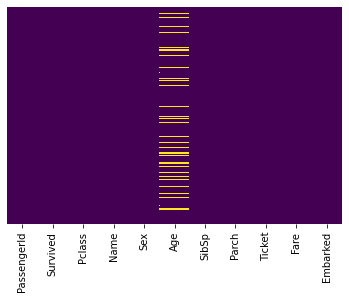

In [5]:
sns.heatmap(titanic.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
titanicWithAge = titanic[pd.isnull(titanic['Age']) == False]
titanicWithoutAge = titanic[pd.isnull(titanic['Age'])]

In [8]:
variables = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age']

categorical variables must be encoded as numeric values. This task can be done using one-hot encoding.

In [9]:
one_hot_encoded_embarked = pd.get_dummies(titanicWithAge['Embarked'])
one_hot_encoded_sex = pd.get_dummies(titanicWithAge['Sex'])
titanicWithAge = titanicWithAge[variables]
titanicWithAge = pd.concat([titanicWithAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)

one_hot_encoded_embarked = pd.get_dummies(titanicWithoutAge['Embarked'])
one_hot_encoded_sex = pd.get_dummies(titanicWithoutAge['Sex'])
titanicWithoutAge = titanicWithoutAge[variables]
titanicWithoutAge = pd.concat([titanicWithoutAge, one_hot_encoded_sex, one_hot_encoded_embarked], axis = 1)


## Prediction

In [10]:
independentVariables = ['Pclass', 'female', 'male', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S']

rfModel_age = RandomForestRegressor()
rfModel_age.fit(titanicWithAge[independentVariables], titanicWithAge['Age'])

generatedAgeValues = rfModel_age.predict(X = titanicWithoutAge[independentVariables])

In [11]:
titanicWithoutAge['Age'] = generatedAgeValues.astype(int)
data = titanicWithAge.append(titanicWithoutAge)

In [12]:
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

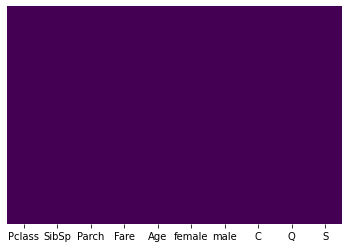

In [13]:
sns.heatmap(data.isnull(), yticklabels=False,cbar=False,cmap='viridis')